11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training with AdaGrad optimizer...


c:\Users\tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with RMSProp optimizer...
Training with Adam optimizer...


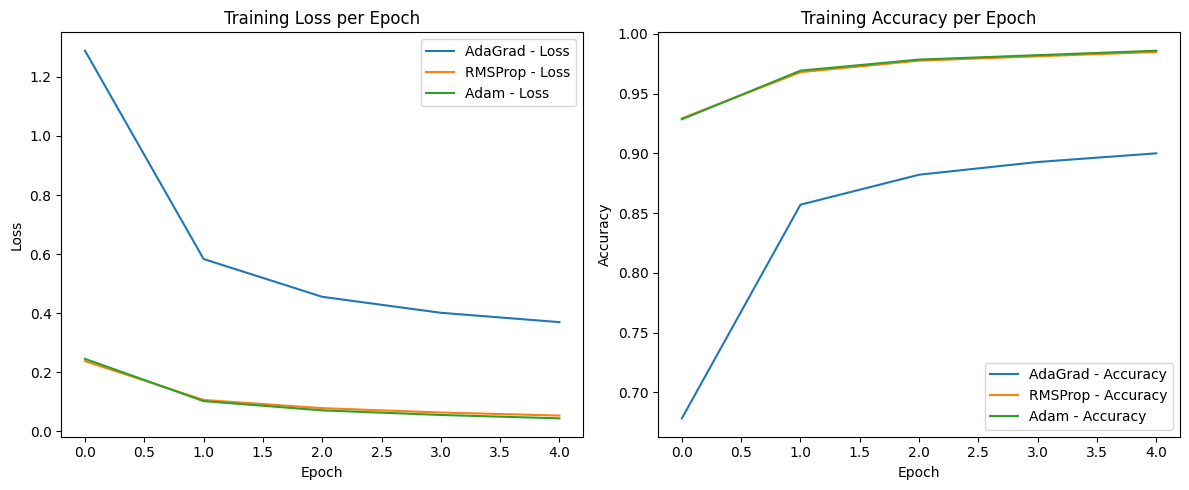

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize the data

# Define a simple feedforward neural network
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model using different optimizers
def train_model(optimizer_name, optimizer):
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
    return history

# Train models with AdaGrad, RMSProp, and Adam optimizers
optimizers = {
    'AdaGrad': Adagrad(),
    'RMSProp': RMSprop(),
    'Adam': Adam()
}

histories = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    histories[name] = train_model(name, optimizer)

# Plot the results: Loss and Accuracy for each optimizer
def plot_histories(histories):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        plt.plot(history.history['loss'], label=f'{name} - Loss')
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{name} - Accuracy')
    plt.title('Training Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_histories(histories)
